In [34]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import mpl

plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 梯度下降实现

$\begin{aligned}
J &=\sum_{i=1}^n\left[y^i-f\left(x^i ; w, b\right)\right]^2 \\
&=\sum_{i=1}^n\left[y^i-\left(w x^i+b\right)\right]^2 \\
\frac{\partial J}{\partial w} &=\sum_{i=1}^n 2 \cdot\left[y^i-\left(w x^i+b\right)\right] \cdot\left(-x^i\right) \\
\frac{\partial J}{\partial b} &=\sum_{i=1}^n 2 \cdot\left[y^i-\left(w x^i+b\right)\right] \cdot(-1)
\end{aligned}$

In [35]:
def gradient_descent(x_data, y_data,
                     w, b,
                     ws, bs,
                     iteration=1e5,
                     learning_rate=1e-6):
    i = 0
    losses = []

    while True:
        # 终止条件
        i += 1
        if i > iteration:
            break

        # 计算梯度需要累加所有的样本
        w_grad = 0.0
        b_grad = 0.0
        loss = 0.0
        for n in range(len(x_data)):
            common = y_data[n] - (w * x_data[n] + b)
            w_grad += -2.0 * common * (x_data[n])
            b_grad += -2.0 *common
            loss += common ** 2
        losses.append(loss)
        # 执行梯度下降
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # 保存中间结果, 便于分析
        ws.append(w)
        bs.append(b)

    # 返回损失函数值
    return np.array(losses) / len(x_data)

# 梯度下降测试

## 配置项

In [36]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.1]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

## 绘图展示

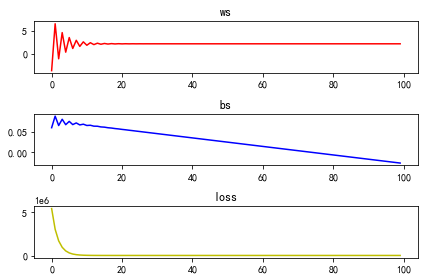

w = 2.1279002008328423
b = -0.027644274471994343
loss = 20073.028038006036


In [37]:
w = 10
b = 0.1
ws = []
bs = []
iteration = 100
counts = np.arange(0, iteration)
losses = gradient_descent(x_data, y_data, w, b, ws, bs, iteration)

plt.subplot(3, 1, 1)
plt.plot(counts, ws, 'r-')
plt.title('ws')

plt.subplot(3, 1, 2)
plt.plot(counts, bs, 'b-')
plt.title('bs')

plt.subplot(3, 1, 3)
plt.plot(counts, losses, 'y-')
plt.title('loss')

plt.tight_layout()
plt.show()

print(f"w = {ws[-1]}")
print(f"b = {bs[-1]}")
print(f"loss = {losses[-1]}")

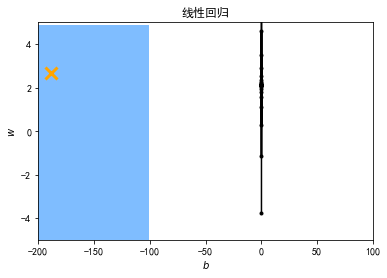

In [40]:
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros([len(x), len(y)])
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(bs, ws, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, 100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()

### 选择不同的初值进行尝试

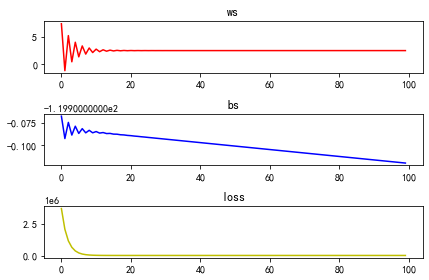

w = 2.4726998458781426
b = -120.0195173209394
loss = 11487.508174292045


In [41]:
w = -4
b = -120
ws = []
bs = []
iteration = 100
counts = np.arange(0, iteration)
losses = gradient_descent(x_data, y_data, w, b, ws, bs, iteration)

plt.subplot(3, 1, 1)
plt.plot(counts, ws, 'r-')
plt.title('ws')

plt.subplot(3, 1, 2)
plt.plot(counts, bs, 'b-')
plt.title('bs')

plt.subplot(3, 1, 3)
plt.plot(counts, losses, 'y-')
plt.title('loss')

plt.tight_layout()
plt.show()

print(f"w = {ws[-1]}")
print(f"b = {bs[-1]}")
print(f"loss = {losses[-1]}")

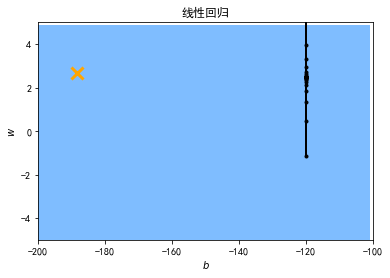

In [42]:
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros([len(x), len(y)])
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(bs, ws, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()

### 增加迭代次数

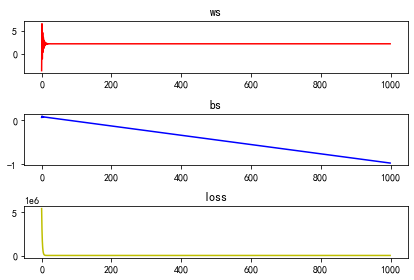

w = 2.1306087130172067
b = -0.9702190567933665
loss = 19974.309832598155


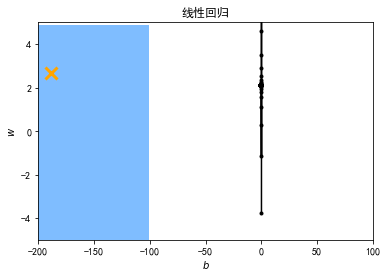

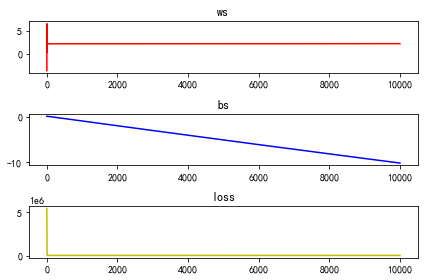

w = 2.1569594272454076
b = -10.14038962326831
loss = 19039.742464195282


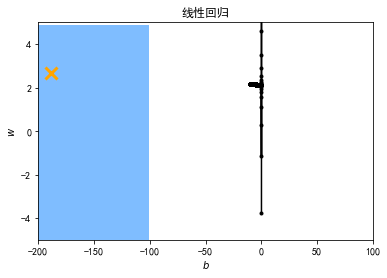

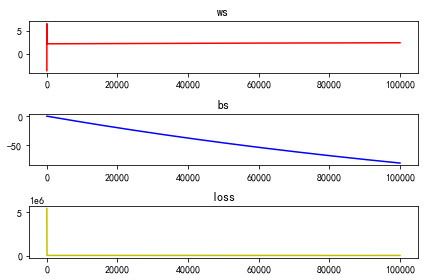

w = 2.3590085487500385
b = -80.45441948060741
loss = 13431.505262843577


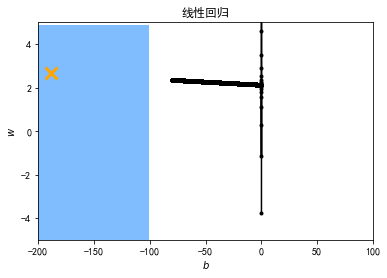

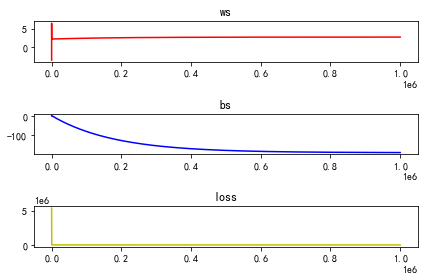

w = 2.667077514036628
b = -187.6638458912259
loss = 10185.184013056412


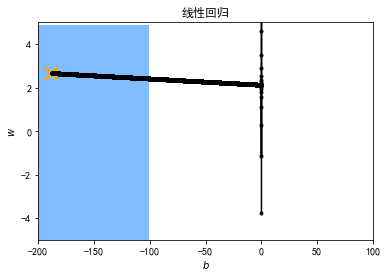

In [47]:
def test_demo01(iteration):
    w = 10
    b = 0.1
    ws = []
    bs = []
    counts = np.arange(0, iteration)
    losses = gradient_descent(x_data, y_data, w, b, ws, bs, iteration)

    plt.subplot(3, 1, 1)
    plt.plot(counts, ws, 'r-')
    plt.title('ws')

    plt.subplot(3, 1, 2)
    plt.plot(counts, bs, 'b-')
    plt.title('bs')

    plt.subplot(3, 1, 3)
    plt.plot(counts, losses, 'y-')
    plt.title('loss')

    plt.tight_layout()
    plt.show()

    print(f"w = {ws[-1]}")
    print(f"b = {bs[-1]}")
    print(f"loss = {losses[-1]}")

    x = np.arange(-200, -100, 1)
    y = np.arange(-5, 5, 0.1)
    Z = np.zeros([len(x), len(y)])
    plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
    plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
    plt.plot(bs, ws, 'o-', ms=3, lw=1.5, color='black')
    plt.xlim(-200, 100)
    plt.ylim(-5, 5)
    plt.xlabel(r'$b$')
    plt.ylabel(r'$w$')
    plt.title("线性回归")
    plt.show()


iteration = 100
for i in range(1,5):
    test_demo01(iteration* 10**i)

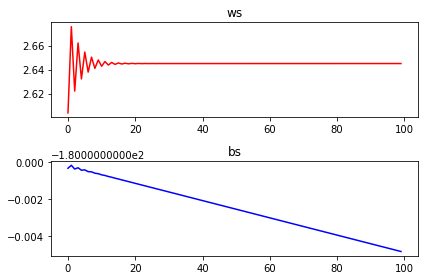

w = 2.6450691323313666
b = -180.0048271495838


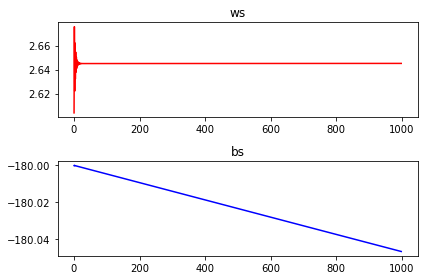

w = 2.6451895516264994
b = -180.04673362188677


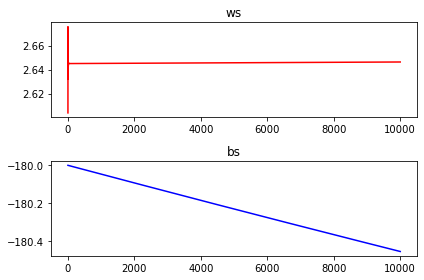

w = 2.6463610931282275
b = -180.45443548922566


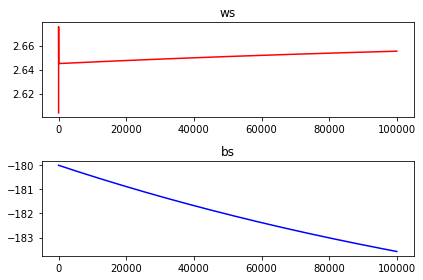

w = 2.655344110786868
b = -183.5805672296411


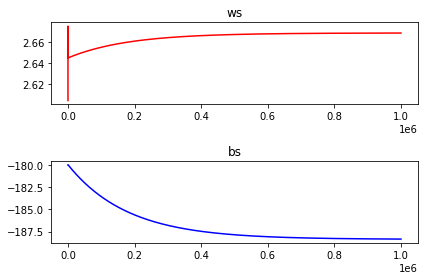

w = 2.669040725425152
b = -188.34705254493934


In [15]:
def test_demo02(iteration):
    w = 2.7
    b = -180
    ws = []
    bs = []
    counts = np.arange(0, iteration)
    gradient_descent(x_data, y_data, w, b, ws, bs, iteration)

    plt.subplot(2, 1, 1)
    plt.plot(counts, ws, 'r-')
    plt.title('ws')

    plt.subplot(2, 1, 2)
    plt.plot(counts, bs, 'b-')
    plt.title('bs')

    plt.tight_layout()
    plt.show()

    print(f"w = {ws[-1]}")
    print(f"b = {bs[-1]}")

iteration = 100
for i in range(5):
    test_demo02(iteration* 10**i)
